# Dependencias

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_roc
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.impute import SimpleImputer

from varclushi import VarClusHi
from scipy import stats

from functools import reduce

import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt

cf.go_offline()
pd.set_option('display.max_columns',None)

# Lectura de datos 

In [2]:
ruta = '/home/oscarjarillo/Documentos/Análisis Multivariado/Varios/Cancer_Data.csv'
df = pd.read_csv(ruta)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [5]:
df.shape

(569, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Definición de variables

In [7]:
um = ['id']
vart = ['diagnosis']
varc = [v for v in df.columns if v not in um and v not in vart]

# Análisis exploratorio

## Balanceo de muestra

In [8]:
df[vart].value_counts()

diagnosis
B            357
M            212
dtype: int64

In [1]:
X = pd.concat([d.sample(212) for _,d in df.groupby(vart[0])], ignore_index=True)

NameError: name 'pd' is not defined

In [ ]:
X[vart].value_counts()

## Valores nulos

In [11]:
nulos = 1-X.describe().T[['count']]/len(X)
nulos

,count
id,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0
symmetry_mean,0.0


## Varianza nula

In [12]:
vt = VarianceThreshold()
vt.fit(X[varc])

VarianceThreshold()

In [13]:
fuera = [a for a,b in zip(varc,vt.get_support())if not b]
fuera

[]

# Multicolinealidad

In [14]:
vc = VarClusHi(df=X,feat_list=varc).varclus().rsquare.sort_values(by=['Cluster','RS_Ratio']).reset_index(drop=True)
display(vc)
best = sorted(vc.groupby('Cluster').first()['Variable'])
best

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,perimeter_worst,0.977630,0.561363,0.050998
1,0,perimeter_mean,0.967451,0.535146,0.070019
2,0,radius_worst,0.967431,0.544458,0.071495
3,0,radius_mean,0.953103,0.516373,0.096970
4,0,area_mean,0.941816,0.592865,0.142912
5,0,area_worst,0.931565,0.599713,0.170965
6,0,concave points_mean,0.810389,0.704844,0.642409
7,0,concave points_worst,0.698355,0.787533,1.419722
8,1,concavity_worst,0.917503,0.434581,0.145904
9,1,compactness_mean,0.909430,0.595582,0.223953


['concavity_se',
 'concavity_worst',
 'perimeter_worst',
 'radius_se',
 'smoothness_mean',
 'texture_se',
 'texture_worst']

## Selección de variables con mejor poder predictivo

In [15]:
sk = SelectKBest(k=len(best))
sk.fit(X[best],X[vart[0]])

SelectKBest(k=7)

In [16]:
pd.DataFrame(zip(best,sk.scores_),columns=['var','score']).set_index('var').sort_values(by='score',
                                ascending=False).iplot(kind='bar',color='orange')

In [17]:
sk = SelectKBest(k=5)
sk.fit(X[best],X[vart[0]])

SelectKBest(k=5)

In [18]:
best = [a for a,b in zip(best,sk.get_support())if b]
best

['concavity_worst',
 'perimeter_worst',
 'radius_se',
 'smoothness_mean',
 'texture_worst']

## Valores extremos

array([[<AxesSubplot:title={'center':'concavity_worst'}>,
        <AxesSubplot:title={'center':'perimeter_worst'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'texture_worst'}>, <AxesSubplot:>]],
      dtype=object)

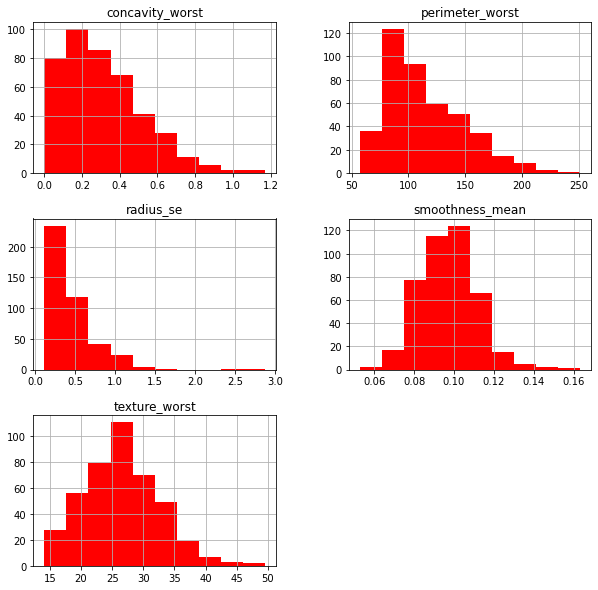

In [19]:
X[best].hist(figsize=(10,10),color='red')

In [20]:
for v,li,ls in X[best].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    X[f'ex_{v}'] = ((X[v]<li)|(X[v]>ls)).astype(int)
X['ex_'] = X.filter(like='ex_').max(axis=1)
X['ex_'].value_counts(1)

0    0.908019
1    0.091981
Name: ex_, dtype: float64

In [21]:
for v,li,ls in X[best].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    X.loc[X[v]<li,v]= np.nan
    X.loc[X[v]>ls,v]= np.nan

In [22]:
im = SimpleImputer(strategy='median')
im.fit(X[best])

SimpleImputer(strategy='median')

In [23]:
Xi = pd.DataFrame(im.transform(X[best]),columns=best)

In [24]:
ks = pd.DataFrame(map(lambda v:(v,stats.ks_2samp(Xi[v],X[v].dropna()).statistic),best),columns=['var','ks']).set_index('var')
ks.sort_values(by='ks',ascending=False,inplace=True)
ks

,ks
var,
radius_se,0.011792
smoothness_mean,0.011792
texture_worst,0.011792
perimeter_worst,0.011735
concavity_worst,0.005882


In [25]:
best = [v for v in ks.index if ks['ks'][-1]<0.05]
best

['radius_se',
 'smoothness_mean',
 'texture_worst',
 'perimeter_worst',
 'concavity_worst']

array([[<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'texture_worst'}>,
        <AxesSubplot:title={'center':'perimeter_worst'}>],
       [<AxesSubplot:title={'center':'concavity_worst'}>, <AxesSubplot:>]],
      dtype=object)

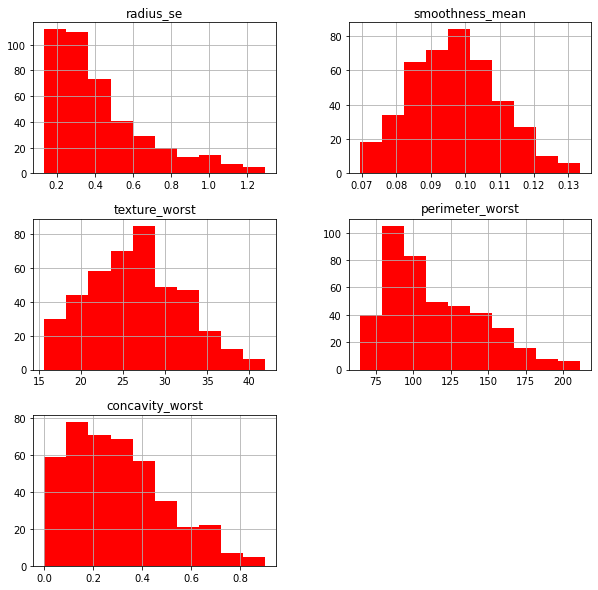

In [26]:
Xi[best].hist(figsize=(10,10),color='red')

## Cambio de espacio $\mathcal{X}_{[0,1]}$

In [27]:
sc = MinMaxScaler()
sc.fit(Xi[best])

MinMaxScaler()

In [28]:
X01 = pd.DataFrame(sc.transform(Xi[best]),columns=best)
X01[um+vart] = X[um+vart]

# Partición

In [29]:
Xt,Xv,yt,yv = train_test_split(X01[um+best],X01[um+vart],train_size=0.7)
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
yv.reset_index(drop=True,inplace=True)
yt.reset_index(drop=True,inplace=True)

# Aprendizaje

## Pasivo-Agresivo

In [30]:
hp1 = dict(max_iter=range(100,200),
           fit_intercept=[True,False],
           C = np.arange(0.1,3,0.1))

modelo1 = PassiveAggressiveClassifier()

grid1 = GridSearchCV(param_grid=hp1,
                    cv=3,
                    estimator=modelo1,
                    verbose=True,
                    n_jobs=-1,
                    scoring='accuracy')

In [31]:
grid1.fit(Xt[best],yt[vart[0]])

Fitting 3 folds for each of 5800 candidates, totalling 17400 fits


GridSearchCV(cv=3, estimator=PassiveAggressiveClassifier(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9]),
                         'fit_intercept': [True, False],
                         'max_iter': range(100, 200)},
             scoring='accuracy', verbose=True)

In [32]:
grid1.best_params_

{'C': 1.1, 'fit_intercept': True, 'max_iter': 152}

In [33]:
modelo1 = grid1.best_estimator_
modelo1

PassiveAggressiveClassifier(C=1.1, max_iter=152)

In [34]:
modelo1.fit(Xt[best],yt[vart[0]])

PassiveAggressiveClassifier(C=1.1, max_iter=152)

### Validación del modelo

In [35]:
St1 = Xt.merge(yt,on=um,how='inner')
Sv1 = Xv.merge(yv,on=um,how='inner')

In [36]:
St1['y^'] = modelo1.predict(Xt[best])
Sv1['y^'] = modelo1.predict(Xv[best])

In [37]:
print(accuracy_score(y_pred=St1['y^'],y_true=St1[vart[0]]))
print(accuracy_score(y_pred=Sv1['y^'],y_true=Sv1[vart[0]]))

0.8682432432432432
0.8984375


In [38]:
print(confusion_matrix(y_pred=St1['y^'],y_true=St1[vart[0]]))
print(confusion_matrix(y_pred=Sv1['y^'],y_true=Sv1[vart[0]]))

[[113  38]
 [  1 144]]
[[48 13]
 [ 0 67]]


## Máquina vector soporte

In [39]:
hp2 = dict(C = np.arange(0.1,3,0.1),
           kernel=['linear','poly','rbf','sigmoid'],
           degree=range(2,3),
           probability=[True])

modelo2 = SVC()

grid2 = GridSearchCV(param_grid=hp2,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1,
                    verbose=True,
                    estimator=modelo2)

In [40]:
grid2.fit(Xt[best],yt[vart[0]])

Fitting 5 folds for each of 116 candidates, totalling 580 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9]),
                         'degree': range(2, 3),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True]},
             scoring='accuracy', verbose=True)

In [41]:
grid2.best_params_

{'C': 0.2, 'degree': 2, 'kernel': 'poly', 'probability': True}

In [42]:
modelo2 = grid2.best_estimator_
modelo2

SVC(C=0.2, degree=2, kernel='poly', probability=True)

In [44]:
modelo2.fit(Xt[best],yt[vart[0]])

SVC(C=0.2, degree=2, kernel='poly', probability=True)

### Validación del modelo

In [45]:
St2 = Xt.merge(yt,on=um,how='inner')
Sv2 = Xv.merge(yv,on=um,how='inner')

In [46]:
St2['y^'] = modelo2.predict(Xt[best])
Sv2['y^'] = modelo2.predict(Xv[best])

St2['proba'] = modelo2.predict_proba(Xt[best])[:,1]
Sv2['proba'] = modelo2.predict_proba(Xv[best])[:,1]

In [47]:
print(accuracy_score(y_pred=St2['y^'],y_true=St2[vart[0]]))
print(accuracy_score(y_pred=Sv2['y^'],y_true=Sv2[vart[0]]))

0.9695945945945946
0.9453125


In [48]:
print(confusion_matrix(y_pred=St2['y^'],y_true=St2[vart[0]]))
print(confusion_matrix(y_pred=Sv2['y^'],y_true=Sv2[vart[0]]))

[[149   2]
 [  7 138]]
[[59  2]
 [ 5 62]]


In [49]:
print(roc_auc_score(y_score=St2['proba'],y_true=St2[vart[0]]))
print(roc_auc_score(y_score=Sv2['proba'],y_true=Sv2[vart[0]]))

0.9931491208038364
0.9916809395644728


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 432x288 with 0 Axes>

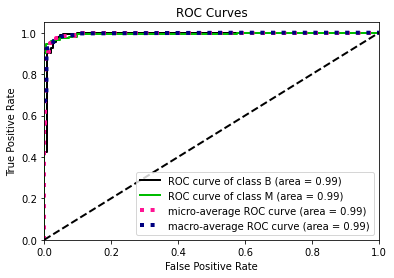

<Figure size 432x288 with 0 Axes>

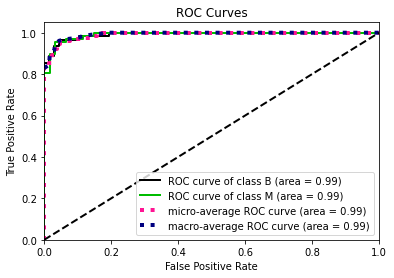

In [50]:
plt.figure()
plot_roc(y_probas=modelo2.predict_proba(Xt[best]),y_true=St2[vart[0]])
plt.figure()
plot_roc(y_probas=modelo2.predict_proba(Xv[best]),y_true=Sv2[vart[0]])

<AxesSubplot:xlabel='proba', ylabel='Density'>

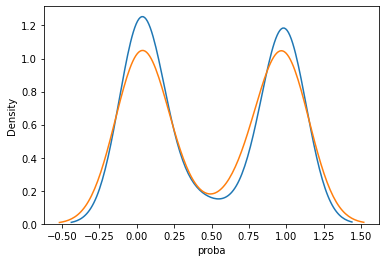

In [51]:
sns.kdeplot(data=St2['proba'])
sns.kdeplot(data=Sv2['proba'])

## Análisis discriminante

In [52]:
modelo3 = LinearDiscriminantAnalysis()
modelo3.fit(Xt[best],yt[vart[0]])

LinearDiscriminantAnalysis()

### Validación del modelo

In [53]:
St3 = Xt.merge(yt,on=um,how='inner')
Sv3 = Xv.merge(yv,on=um,how='inner')

In [54]:
St3['y^'] = modelo3.predict(Xt[best])
Sv3['y^'] = modelo3.predict(Xv[best])

St3['proba'] = modelo3.predict_proba(Xt[best])[:,1]
Sv3['proba'] = modelo3.predict_proba(Xv[best])[:,1]

In [55]:
print(accuracy_score(y_pred=St3['y^'],y_true=St3[vart[0]]))
print(accuracy_score(y_pred=Sv3['y^'],y_true=Sv3[vart[0]]))

0.9527027027027027
0.921875


In [56]:
print(confusion_matrix(y_pred=St3['y^'],y_true=St3[vart[0]]))
print(confusion_matrix(y_pred=Sv3['y^'],y_true=Sv3[vart[0]]))

[[149   2]
 [ 12 133]]
[[60  1]
 [ 9 58]]


In [57]:
print(roc_auc_score(y_score=St3['proba'],y_true=St3[vart[0]]))
print(roc_auc_score(y_score=Sv3['proba'],y_true=Sv3[vart[0]]))

0.9896780086777803
0.9882554440910203


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 432x288 with 0 Axes>

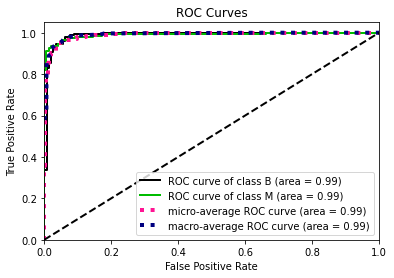

<Figure size 432x288 with 0 Axes>

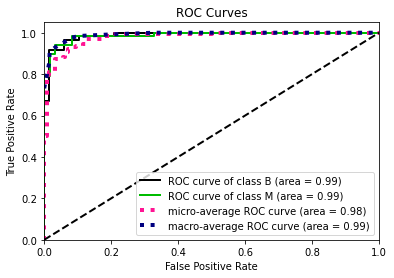

In [58]:
plt.figure()
plot_roc(y_probas=modelo3.predict_proba(Xt[best]),y_true=St3[vart[0]])
plt.figure()
plot_roc(y_probas=modelo3.predict_proba(Xv[best]),y_true=Sv3[vart[0]])

<AxesSubplot:xlabel='proba', ylabel='Density'>

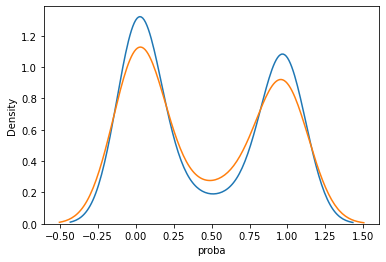

In [59]:
sns.kdeplot(data=St3['proba'])
sns.kdeplot(data=Sv3['proba'])

## Regresión logística

In [60]:
modelo4 = LogisticRegression()
modelo4.fit(Xt[best],yt[vart[0]])

LogisticRegression()

### Validación del modelo

In [61]:
St4 = Xt.merge(yt,on=um,how='inner')
Sv4 = Xv.merge(yv,on=um,how='inner')

In [62]:
St4['y^'] = modelo4.predict(Xt[best])
Sv4['y^'] = modelo4.predict(Xv[best])

St4['proba'] = modelo4.predict_proba(Xt[best])[:,1]
Sv4['proba'] = modelo4.predict_proba(Xv[best])[:,1]

In [63]:
print(accuracy_score(y_pred=St4['y^'],y_true=St4[vart[0]]))
print(accuracy_score(y_pred=Sv4['y^'],y_true=Sv4[vart[0]]))

0.9527027027027027
0.9375


In [64]:
print(confusion_matrix(y_pred=St4['y^'],y_true=St4[vart[0]]))
print(confusion_matrix(y_pred=Sv4['y^'],y_true=Sv4[vart[0]]))

[[147   4]
 [ 10 135]]
[[60  1]
 [ 7 60]]


In [65]:
print(roc_auc_score(y_score=St4['proba'],y_true=St4[vart[0]]))
print(roc_auc_score(y_score=Sv4['proba'],y_true=Sv4[vart[0]]))

0.9895866636218315
0.991436261316369


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 432x288 with 0 Axes>

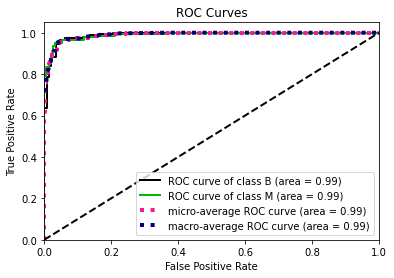

<Figure size 432x288 with 0 Axes>

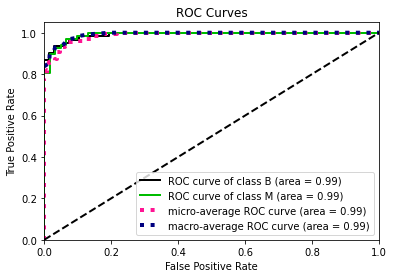

In [66]:
plt.figure()
plot_roc(y_probas=modelo4.predict_proba(Xt[best]),y_true=St4[vart[0]])
plt.figure()
plot_roc(y_probas=modelo4.predict_proba(Xv[best]),y_true=Sv4[vart[0]])

<AxesSubplot:xlabel='proba', ylabel='Density'>

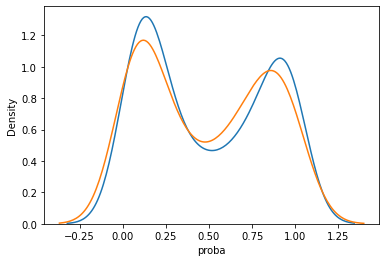

In [67]:
sns.kdeplot(data=St4['proba'])
sns.kdeplot(data=Sv4['proba'])

## Red neuronal

In [68]:
hp3 = dict(hidden_layer_sizes = [(a,b,c,) for a in range(2,14) for b in range(2,14) for c in range(2,14)] ,
activation=['identity', 'logistic', 'tanh', 'relu'],
solver=['sgd'],
alpha=np.arange(0.0001,0.001,0.0001),
learning_rate = ['constant', 'invscaling', 'adaptive'],
max_iter = [10000]
)

modelo5 = MLPClassifier()

grid3 = RandomizedSearchCV(param_distributions=hp3,
                          n_iter=100,
                          cv=3,
                          scoring='roc_auc',
                          n_jobs=-1,
                          verbose=True,
                          estimator=modelo5)

In [69]:
grid3.fit(Xt[best],yt[vart[0]])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=MLPClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                                        'hidden_layer_sizes': [(2, 2, 2),
                                                               (2, 2, 3),
                                                               (2, 2, 4),
                                                               (2, 2, 5),
                                                               (2, 2, 6),
                                                               (2, 2, 7),
                                                               (2, 2, 8),
                                                               (2, 2, 9),
                                                               (2, 2, 10),
                                                               (2, 2, 11),
                                                               (2, 2, 12),
                                                               (2, 2, 13),
                                                               (2, 3, 2),
                                                               (2, 3, 3),
                                                               (2, 3, 4),
                                                               (2, 3, 5),
                                                               (2, 3, 6),
                                                               (2, 3, 7),
                                                               (2, 3, 8),
                                                               (2, 3, 9),
                                                               (2, 3, 10),
                                                               (2, 3, 11),
                                                               (2, 3, 12),
                                                               (2, 3, 13),
                                                               (2, 4, 2),
                                                               (2, 4, 3),
                                                               (2, 4, 4),
                                                               (2, 4, 5),
                                                               (2, 4, 6),
                                                               (2, 4, 7), ...],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'max_iter': [10000],
                                        'solver': ['sgd']},
                   scoring='roc_auc', verbose=True)

In [70]:
grid3.best_params_

{'solver': 'sgd',
 'max_iter': 10000,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (11, 3, 8),
 'alpha': 0.0004,
 'activation': 'identity'}

In [71]:
modelo5 = grid3.best_estimator_
modelo5

MLPClassifier(activation='identity', alpha=0.0004,
              hidden_layer_sizes=(11, 3, 8), max_iter=10000, solver='sgd')

In [72]:
modelo5.fit(Xt[best],yt[vart[0]])

MLPClassifier(activation='identity', alpha=0.0004,
              hidden_layer_sizes=(11, 3, 8), max_iter=10000, solver='sgd')

### Validación del modelo

In [73]:
St5 = Xt.merge(yt,on=um,how='inner')
Sv5 = Xv.merge(yv,on=um,how='inner')

In [74]:
St5['y^'] = modelo5.predict(Xt[best])
Sv5['y^'] = modelo5.predict(Xv[best])

St5['proba'] = modelo5.predict_proba(Xt[best])[:,1]
Sv5['proba'] = modelo5.predict_proba(Xv[best])[:,1]

In [75]:
print(accuracy_score(y_pred=St5['y^'],y_true=St5[vart[0]]))
print(accuracy_score(y_pred=Sv5['y^'],y_true=Sv5[vart[0]]))

0.9594594594594594
0.9375


In [76]:
print(confusion_matrix(y_pred=St5['y^'],y_true=St5[vart[0]]))
print(confusion_matrix(y_pred=Sv5['y^'],y_true=Sv5[vart[0]]))

[[147   4]
 [  8 137]]
[[58  3]
 [ 5 62]]


In [77]:
print(roc_auc_score(y_score=St5['proba'],y_true=St5[vart[0]]))
print(roc_auc_score(y_score=Sv5['proba'],y_true=Sv5[vart[0]]))

0.9923726878282713
0.9926596525568877


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 432x288 with 0 Axes>

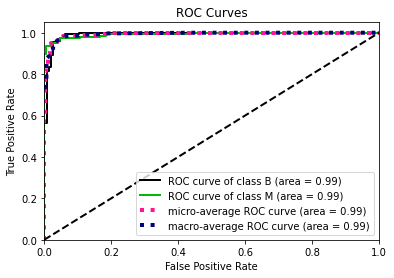

<Figure size 432x288 with 0 Axes>

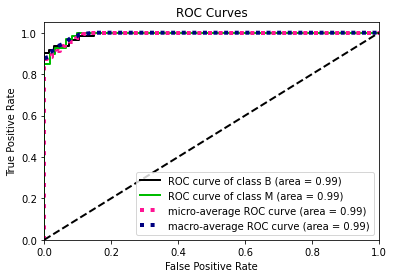

In [78]:
plt.figure()
plot_roc(y_probas=modelo5.predict_proba(Xt[best]),y_true=St5[vart[0]])
plt.figure()
plot_roc(y_probas=modelo5.predict_proba(Xv[best]),y_true=Sv5[vart[0]])

<AxesSubplot:xlabel='proba', ylabel='Density'>

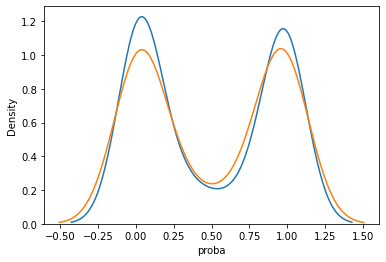

In [79]:
sns.kdeplot(data=St5['proba'])
sns.kdeplot(data=Sv5['proba'])

# Mejor modelo

In [99]:
def acc_score(a,b):
    score1 = accuracy_score(y_pred=a['y^'],y_true=a[vart[0]])
    score2 = accuracy_score(y_pred=b['y^'],y_true=b[vart[0]])
    return [score1, score2]

In [134]:
Mejor = pd.DataFrame(data=[acc_score(St1,Sv1),acc_score(St2,Sv2),acc_score(St3,Sv3),
                           acc_score(St4,Sv4),acc_score(St5,Sv5)],columns=['train','valid'])
Mejor.insert(0,'Modelo',['PA','SVM','DA','LR','RN'])

In [136]:
Mejor['dif_abs'] = np.absolute(Mejor['train'] - Mejor['valid'])

In [147]:
Mejor.sort_values(by=['valid','dif_abs'],ascending=False,inplace=True)
Mejor.head()

,Modelo,train,valid,dif_abs
1,SVM,0.969595,0.945312,0.024282
4,RN,0.959459,0.937500,0.021959
3,LR,0.952703,0.937500,0.015203
2,DA,0.952703,0.921875,0.030828
0,PA,0.868243,0.898438,0.030194


In [157]:
mejormodelo = Mejor.head(1)
mejormodelo

,Modelo,train,valid,dif_abs
1,SVM,0.969595,0.945312,0.024282
